In [42]:
from matplotlib import pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import csv
import seaborn

# Aviation Risk Analysis

<img src="images/airplane-isolated-on-transparent-background-3d-rendering-aircraft-png-2455088391.png" alt="airplane flyting" style="width:300px;height:auto;">

## Overview - This is our conclusion

What have we learned?

## Business Problem

write Business problem here 

## Data Understanding

In [43]:
#import and store data
df = pd.read_csv('data/AviationData.csv', encoding='mac_roman', low_memory=False)
#variables
filter_year = 2001

In [44]:
df.shape

(88889, 31)

In [45]:
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,10/24/1948,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,7/19/1962,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,8/30/1974,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,6/19/1977,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12/9/2000
4,20041105X01764,Accident,CHI79FA064,8/2/1979,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [46]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

We want some of these datatypes to be numbers.
We also want to filter out null and missing data.
We will have to decide which information is relevant to us.

Our first step is to ensure we are only looking at aircraft. 
Our next step is to filter our date ranges. We have decided to make reccomendations in a post 9-11 world and not inlcude accidents pre 2001.

In [47]:
df = df.loc[df['Aircraft.Category']=='Airplane']

In [48]:
df.groupby('Make').sum()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
Make,,,,,,,,,,,,,,,,,,,,,
177MF LLC,20140507X00328,Accident,WPR14LA185,5/4/2014,"Bluffdale, UT",United States,402824N,1115640W,0,0,...,Personal,0,0.0,2.0,0.0,0.0,VMC,0,A complete loss of engine power for reasons th...,25-09-2020
2007 Savage Air LLC,20080611X00834,Incident,DFW08IA126,5/1/2008,"Uvalde, TX",United States,291233N,0994649W,KUVA,Garner Field Airport,...,Personal,0,0.0,0.0,0.0,4.0,VMC,0,The pilot's excessive speed during a turn off ...,25-09-2020
2021FX3 LLC,2.02201E+132.0221E+13,AccidentAccident,WPR22LA079WPR23LA005,1/13/202210/1/2022,"Redmond, ORReno, NV",United StatesUnited States,441515N039405N,0012190W1195235W,RDMRTS,ROBERTS FLDRENO/STEAD,...,PersonalPersonal,"2021FX3, LLC2021FX3 LLC",0.0,0.0,0.0,4.0,VMCVMC,0,The pilot's failure to maintain directional co...,14-06-20225/10/2022
3XTRIM,20150806X12451,Accident,CEN15WA338,7/17/2015,"Golub-Dobrzyn City, Poland",Poland,053626N,0019314E,0,0,...,0,0,1.0,0.0,1.0,0.0,0,0,0,25-09-2020
5 RIVERS LLC,2.02208E+13,Accident,ANC22LA064,7/27/2022,"Soldotna, AK",United States,060954N,1502334W,0,0,...,Personal,0,0.0,0.0,1.0,1.0,VMC,0,0,22-08-2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zlin,20181210X21905,Accident,GAA19CA091,12/10/2018,"Chester, CT",United States,041230N,0723017W,SNC,CHESTER,...,Personal,0,0.0,0.0,0.0,1.0,VMC,0,The pilot's loss of airplane control during th...,25-09-2020
Zlin Aviation,2.02012E+13,Accident,CEN21LA074,11/15/2020,"Francis, OK",United States,345229N,0963211W,0,Sand Bar - Canadian River,...,Personal,0,0.0,0.0,0.0,1.0,VMC,0,The pilotís selection of unsuitable terrain fo...,20-08-2021
Zodiac,20180122X43140,Accident,CEN18WA081,1/19/2018,"Castellon, Spain",Spain,040046N,0000323E,0,0,...,0,0,1.0,0.0,1.0,0.0,0,0,0,25-09-2020


In [49]:
df['Year'] = df['Event.Date'].str[-4:]
df['Year'] = df['Year'].astype(int)


In [50]:

df = df.loc[df['Year'] > filter_year]


In [51]:
df.isna().sum()
df['Total.Fatal.Injuries'].isna().sum()

np.int64(2911)

In [52]:
df.dropna()
df.describe()



,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Year
count,21466.000000,21126.000000,21175.000000,21518.000000,23354.000000,24037.000000
mean,1.153871,0.620373,0.305596,0.212845,6.458894,2013.517743
std,0.400254,5.754296,2.202396,0.809652,31.786771,5.127626
min,0.000000,0.000000,0.000000,0.000000,0.000000,2002.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,2009.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000,2013.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000,2018.000000
max,8.000000,295.000000,161.000000,50.000000,576.000000,2022.000000


## Data Cleaning

In [53]:
df.groupby('Purpose.of.flight').sum()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,Year
Purpose.of.flight,,,,,,,,,,,,,,,,,,,,,
ASHO,2.02205E+132.02205E+132.02209E+132.0221E+132.0...,AccidentAccidentAccidentAccidentAccidentAccident,ERA22FA233ERA22LA238WPR22FA350CEN23LA023CEN23M...,5/20/20225/22/20229/18/202210/29/202211/12/202...,"Wayne, NEBealeton, VAReno, NVHouston, TXDallas...",United StatesUnited StatesUnited StatesUnited ...,421410N383459N394230N293620N324026N324026N,0965840W0077464W1195258W0095959W0965146W0965146W,LCGRTSEFDRBDRBD,Wayne Municipal AirportRENO/STEADELLINGTONDall...,...,Commemorative Air ForceCommemorative Air Force,14.0,1.0,0.0,1.0,VMCVMCVMCVMCVMCVMC,0,An inflight collision with a bird while conduc...,31-05-20221/9/20227/10/202220-12-202230-11-202...,12132
Aerial Application,20020815X0140020020815X0140120020404X004672002...,AccidentAccidentAccidentAccidentAccidentAccide...,FTW02WA234FTW02WA235FTW02LA109CHI02CA192CHI02C...,1/12/20021/23/20023/24/20027/16/20027/17/20027...,"EL RANCHITO, DOMINICAN REPUBLICHATO VIEJO, DOM...",Dominican RepublicDominican RepublicUnited Sta...,18.50277819.25583335.03666648.28027840.1333334...,-70.833333-71.168056-90.909444-101.280278-90.3...,HEE5K4IL93XXXE52KBPG0KCLRX54NONENONEAR79PVTNON...,Thompson-RobbinsSCHUY-RUSHHendrickson Flying S...,...,"Fumigaciones Aereas FAPSACropland Air Service,...",129.0,145.0,113.0,553.0,VMCVMCVMCVMCVMCVMCVMCVMCVMCVMCVMCVMCVMCVMCVMCV...,ManeuveringTakeoffManeuveringManeuveringTakeof...,ForeignForeignProbable CauseProbable CauseProb...,1/2/201613-05-200324-10-20029/9/200220-09-2002...,1865741
Aerial Observation,20020509X0064720040506X0056120040709X009422005...,AccidentAccidentAccidentAccidentAccidentAccide...,WAS02RA036FTW04WA120CHI04CA163LAX05CA285DFW06C...,4/24/20025/2/20046/23/20049/1/200511/28/20054/...,"CATACAMAS, HondurasMilpillas, MexicoHUTCHINSON...",HondurasMexicoUnited StatesUnited StatesUnited...,44.8633.95888930.64361131.56666742.97138946.57...,-94.3825-118.821389-93.914722-110.941111-113.3...,HCDT121U0NONEOBEBLH31E11R09FALKPSYCJSEFKCXLHKS...,Hutchinson Municipal AirportKirbyville Airport...,...,Kemper Aviation Inc.Edsal Pty LtdJohn A Ambrou...,101.0,56.0,32.0,126.0,VMCIMCVMCVMCVMCVMCVMCVMCVMCVMCVMCVMCVMCVMCVMCV...,TakeoffCruiseTakeoffCruiseTakeoffManeuveringLa...,ForeignForeignProbable CauseProbable CauseProb...,1/9/200420-12-200528-03-20061/7/20143/10/20062...,322268
Air Drop,20120925X7543120151216X5071720180820X12750,AccidentAccidentAccident,CEN12CA656GAA16CA082GAA18CA501,9/13/201212/13/20158/20/2018,"Cape Girardeau, MOReidsville, NCMcCall, ID",United StatesUnited StatesUnited States,371331N362614N044320N,0893415W0079514W0116340W,CGISIFKMYL,Cape Girardeau RegionalROCKINGHAM COUNTY NC SH...,...,PT 19 Group IncSawtooth Flying Service,0.0,2.0,0.0,3.0,VMCVMCVMC,0,The pilotís failure to maintain sufficient air...,25-09-202025-09-202025-09-2020,6045
Air Race show,20080505X0058920080515X0067120080527X007262008...,AccidentAccidentAccidentAccidentAccidentAccide...,DFW08LA118SEA08LA128DEN08LA090NYC08LA281CEN09L...,4/26/20085/10/20085/17/20088/17/20087/10/20098...,"Galveston, TXModesto, CAHudson, CORhinebeck, N...",United StatesUnited StatesUnited StatesUnited ...,373732N004072N415817N402626N393134N039405N4158...,1205715W0104415W0735146W0952247W1074337W119523...,KGLSKMOD18VNY94K57KRILRTSNY94RTSWICCXFL4SDBTLD...,Scholes International AirportModesto City-Cty ...,...,Old Rhinebeck AerodromeAdrian CooperRHINEBECK ...,35.0,10.0,9.0,46.0,VMCVMCVMCVMCVMCVMCVMCVMCVMCVMCVMCVMCVMCVMCVMCV...,0,The Hurricane pilot's failure to maintain dire...,25-09-202025-09-202025-09-202025-09-202025-09-...,148990
Air Race/show,20030407X0044720031010X0170820061026X015632007...,AccidentAccidentAccidentAccidentAccidentAccide...,MIA03CA093LAX03CA287NYC07FA007LAX07CA107MIA07F...

In [54]:


def categorize_flight(flight_type):
   
    if flight_type in ['Banner Tow',' Business'	, 'Executive/corporate','Ferry', 'Other Work Use', 'Positioning']:
        return 'Commercial'
    elif flight_type in ['Air Race show', 'Air Race/show', 'Glider Tow', 'Instructional', 'Personal', 'Skydiving']:
        return 'Private'
    elif flight_type in ['Aerial Observation', 'Air Drop', 'Firefighting', 'Public Aircraft', 'Public Aircraft - Federal', 'Public Aircraft - Local', 'Public Aircraft - State']:
        return 'Government'
    else:
        return 'Unknown'


We defined our dictionary and we will create a new column with our flight types sorted into smaller categories.


In [72]:
df['flight_category'] = df['Purpose.of.flight'].map(categorize_flight)
df['flight_category'].info

<bound method Series.info of 51979    Unknown
51981    Unknown
51987    Private
51993    Unknown
52013    Private
          ...   
88869    Unknown
88873    Private
88876    Unknown
88877    Private
88886    Private
Name: flight_category, Length: 24037, dtype: object>

We also catergorized injury severity into fewer columns.

In [56]:
def categorize_injury(injury_type):
    level = str(injury_type)
    if 'Non-Fatal' in level:
        return 'Non-Fatal'
    elif 'Fatal' in level:
        return 'Fatal'
    elif 'Minor' == level:
        return 'Minor'
    elif 'Serious' == level:
        return 'Serious'
    else:
        return 'Unavailable'
    
df['Injury_category'] = df['Injury.Severity'].map(categorize_injury)


In [95]:
#export to CSV for tableau 
df.to_csv('data/clean.csv')

We will put stuff what data needed cleaning

In [86]:
#Clean Make Names
df['Make_upper'] = df['Make'].str.upper()
df['Make_upper'].info

<bound method Series.info of 51979                         PIPER
51981                    SWEARINGEN
51987                         PIPER
51993                        CESSNA
52013                        CESSNA
                    ...            
88869                         PIPER
88873            CIRRUS DESIGN CORP
88876                    SWEARINGEN
88877                        CESSNA
88886    AMERICAN CHAMPION AIRCRAFT
Name: Make_upper, Length: 24037, dtype: object>

In [59]:
#we should be using at least one function

## Feature Engineering

Words

In [60]:
#add relevant features 

## Analysis

Words and Figures

Make_upper
CESSNA                       237
PIPER                        137
BEECH                         56
AIR TRACTOR INC               15
RAYTHEON AIRCRAFT COMPANY     14
DEHAVILLAND                   13
BELLANCA                      11
AERO COMMANDER                10
AIR TRACTOR                   10
EMBRAER                       10
Name: count, dtype: int64


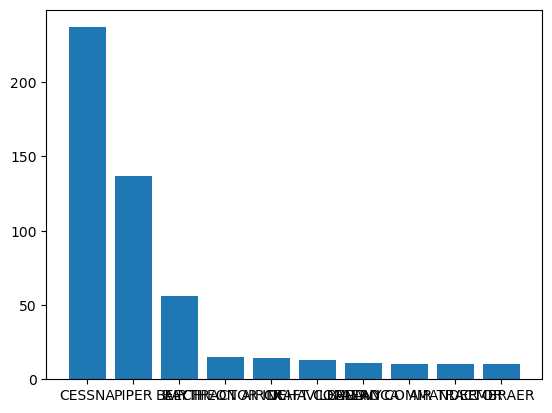

In [88]:
#accidents per year
fig, ax = plt.subplots()

commercial_flights_df = df[(df['flight_category'] == "Commercial")]

accidents_per_model_commercial = commercial_flights_df['Make_upper'].value_counts()[:10]

x = accidents_per_model_commercial.index
y = accidents_per_model_commercial.values

ax.bar(x, y)

print(accidents_per_model_commercial)



Make_upper
CESSNA                5558
PIPER                 3258
BEECH                 1086
MOONEY                 323
MAULE                  199
BELLANCA               199
AERONCA                197
CIRRUS DESIGN CORP     189
CHAMPION               145
LUSCOMBE               140
Name: count, dtype: int64


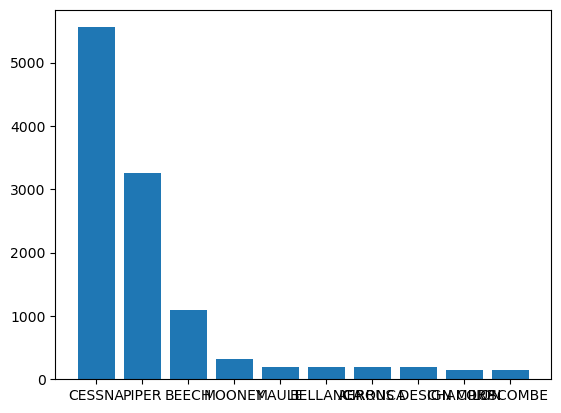

In [94]:
#accidents per year
fig, ax = plt.subplots()

personal_flights_df = df[(df['flight_category'] == "Private")]

accidents_per_model_personal = personal_flights_df['Make_upper'].value_counts()[:10]

x = accidents_per_model_personal.index
y = accidents_per_model_personal.values

ax.bar(x, y)

print(accidents_per_model_personal)


## Conclusions

Words and Figures

## Next Steps

Conclusion 